# Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Datasets

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Exploratory Data Analysis

In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


* From above data description found total 4177 datas.
* There is no missing values,so no need to fill any data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


* From above information we found almost all features are float values instead of sex column

# Finding null values

In [5]:
df.isnull().all().sum()

0

* Here we found there is no null values in the data

In [6]:
df.shape

(4177, 9)

* Here the data has a 4177 rows and 9 columns

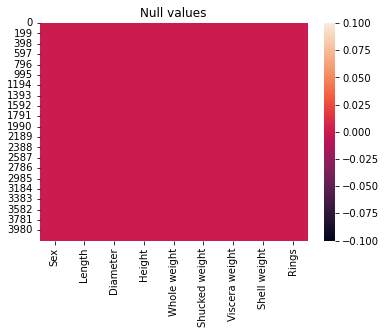

In [7]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

* The red colour area shows no null values in the data

In [8]:
df['Rings'].unique() # Finding unique values of label

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

# Encoding data using LabelEncoder 

In [9]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [10]:
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])
print(df['Sex'].value_counts(),df['Sex'].unique())

2    1528
1    1342
0    1307
Name: Sex, dtype: int64 [2 0 1]


# Correlation between features and labels

In [11]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Correlation matrix

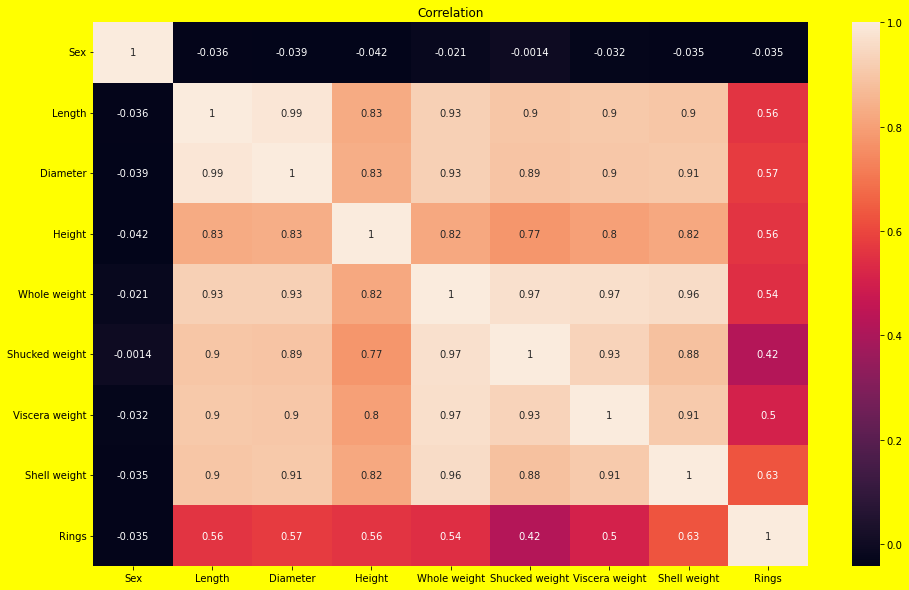

In [12]:
corr_mat=df.corr()
plt.figure(figsize=(16,10),facecolor='yellow')
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation')
plt.show()

* From above cells shows correlation of feature and labels
* From above corr_mat positive and negetive relation of columns in data

# Pairplot

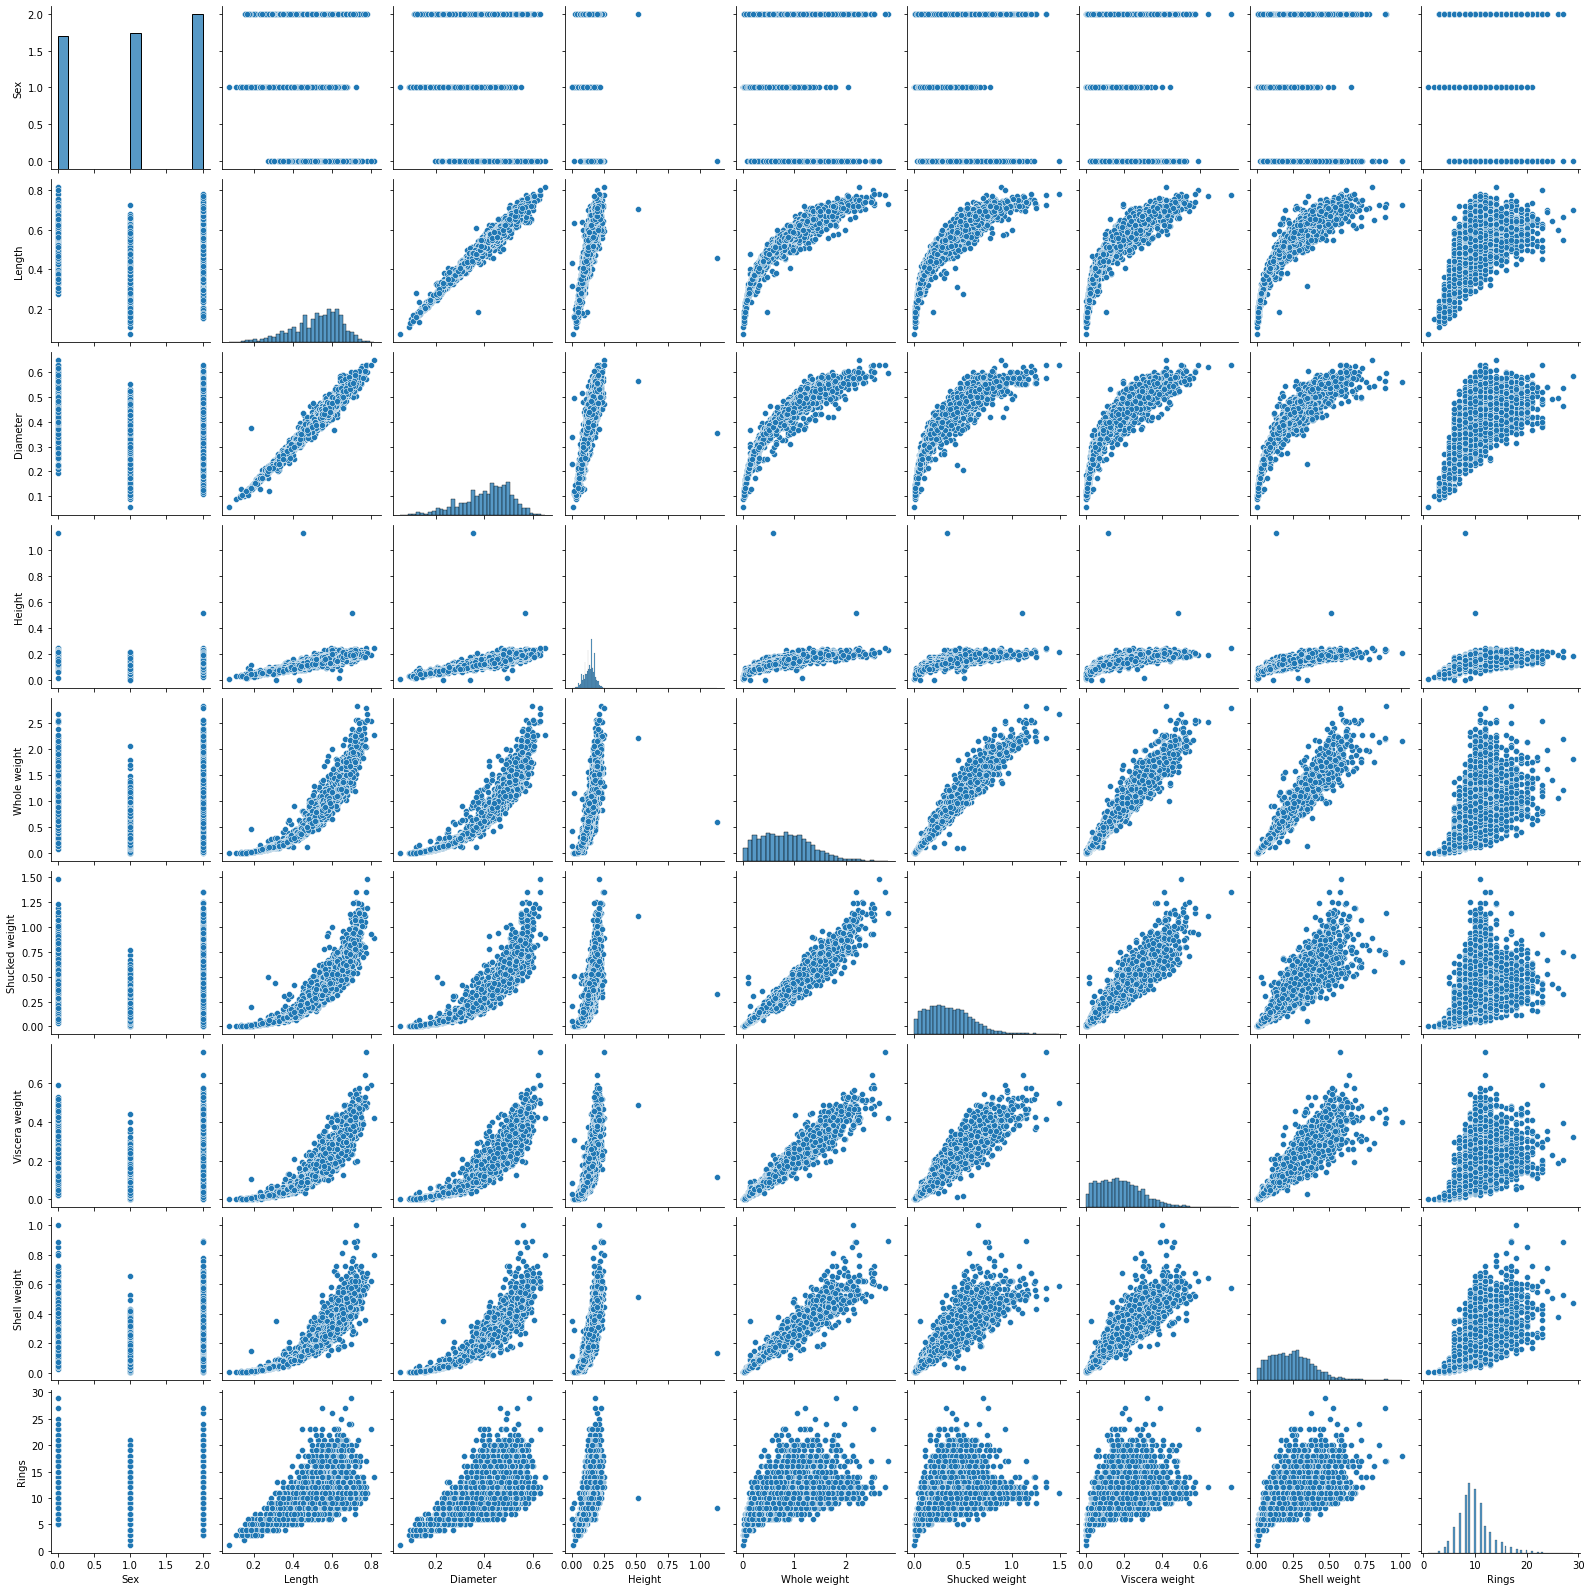

In [13]:
sns.pairplot(df)

* The pairplot of data shows alomost all features has a positive correlation between the feautures and label

# Correlation between feautures and rings

In [14]:
corr_mat=df.corr()
corr_mat['Rings'].sort_values(ascending=True)

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

* From above observation shows almost all columns has a strong relationship with label(ring)

# Data visualisation

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

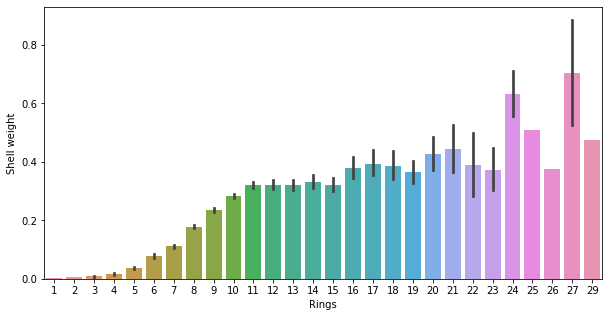

In [15]:
#Shell weight vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Shell weight',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

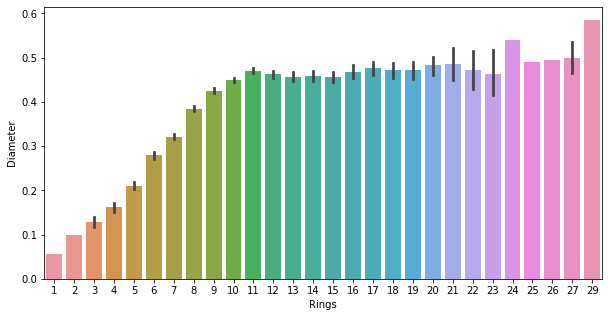

In [16]:
#Diameter vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Diameter',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Height'>

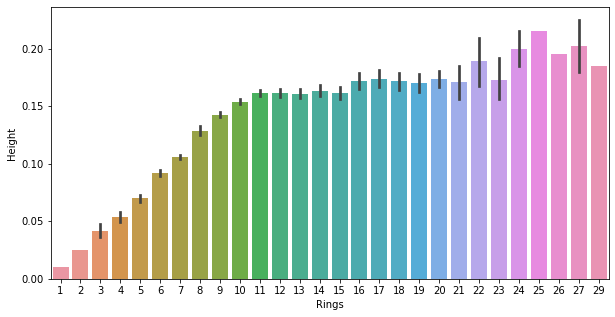

In [17]:
#Height vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Height',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Length'>

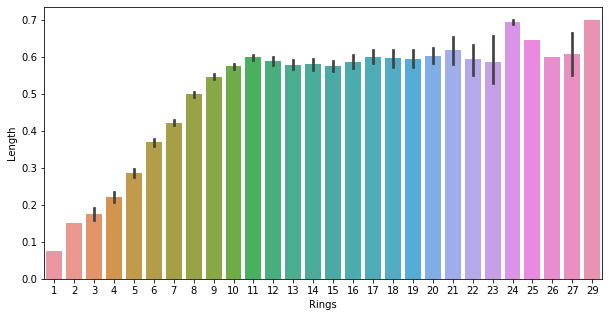

In [18]:
# Length vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Length',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Viscera weight'>

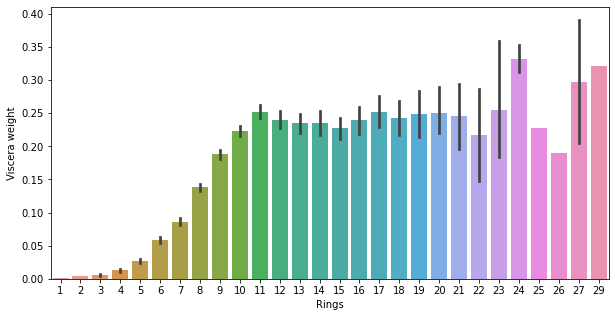

In [19]:
#Vscera weight vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Viscera weight',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Shucked weight'>

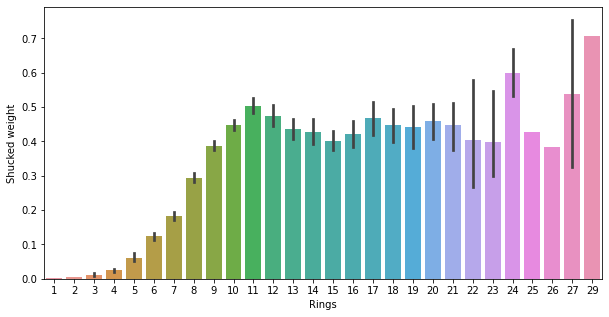

In [20]:
#Shucked weight vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Shucked weight',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

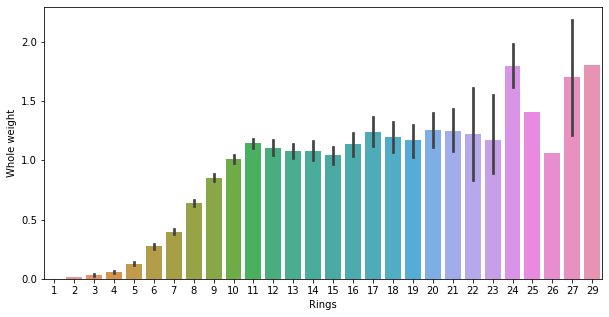

In [21]:
# Whole weight vs rings

plt.figure(figsize=(10,5))
sns.barplot(x='Rings',y='Whole weight',data=df)

# Preprocessing of data

# Finding skeweness in the data

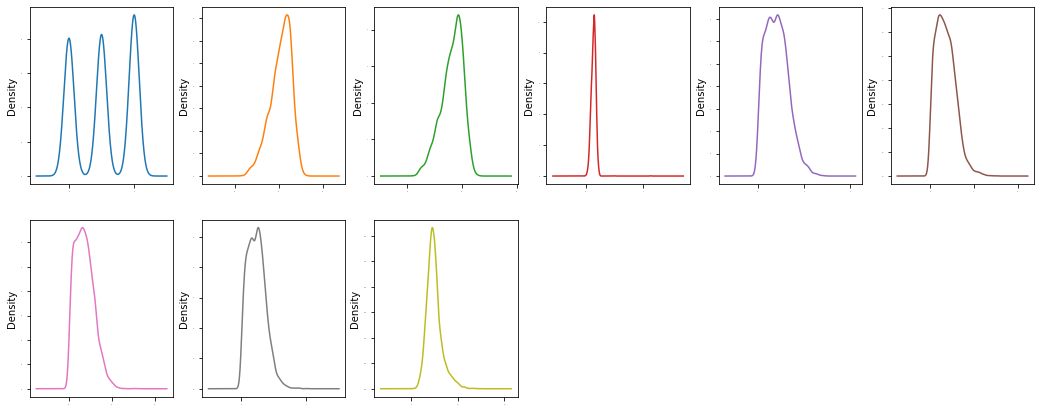

In [22]:
df.plot(kind='density',subplots=True,layout=(4,6),sharex=False,legend=False,fontsize=1,figsize=(18,15))
plt.show()

# Distribution plot

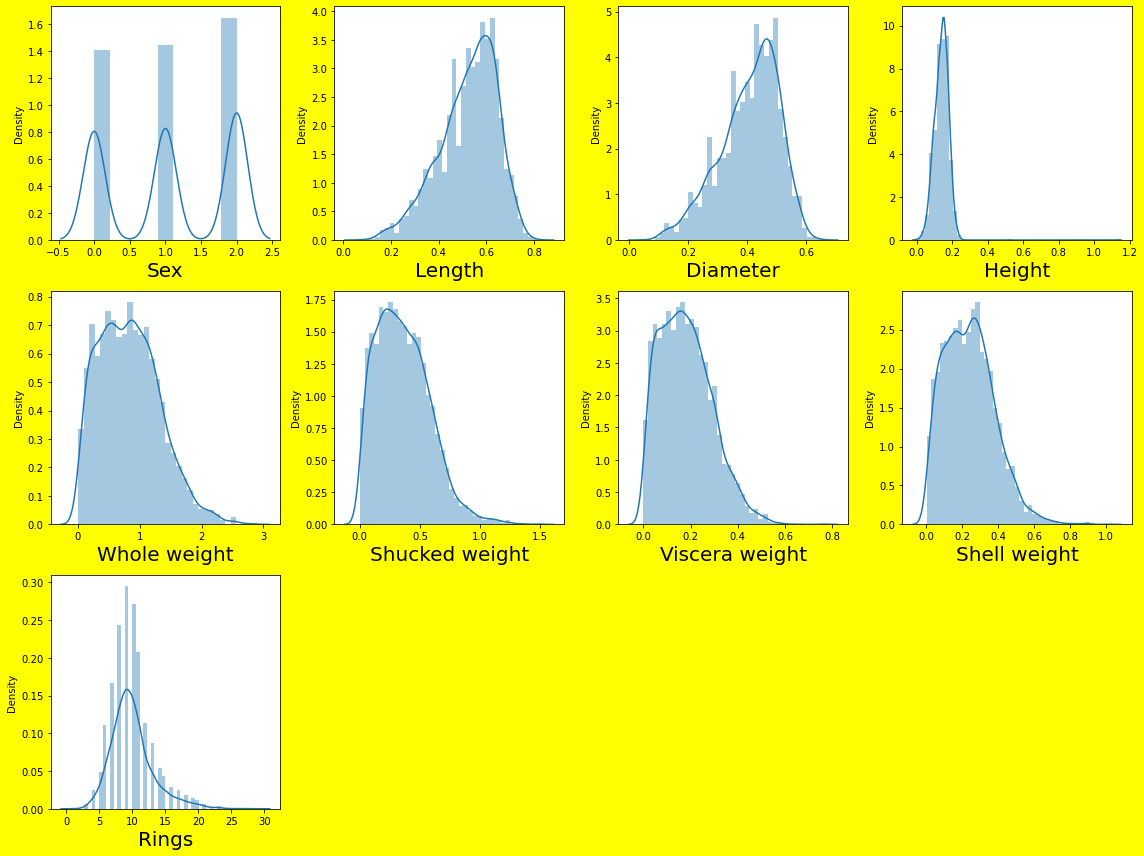

In [23]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()
    

In [24]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

* Here we have found some skeweness in the columns 

# Before removing skeweness seperate features and label from the data

In [25]:
X=df.drop(['Rings','Sex'],axis=1)  # For feautures
Y=df['Rings']    # For labels
s=df['Sex']
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [26]:
X.skew().sort_values(ascending=True)

Length           -0.639873
Diameter         -0.609198
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Height            3.128817
dtype: float64

# Removing of skeweness using sqrt function

In [27]:
X_new=np.sqrt(X[X.columns])
X_new.skew()

Length           -1.020771
Diameter         -0.996014
Height           -0.295641
Whole weight     -0.236646
Shucked weight   -0.141443
Viscera weight   -0.183321
Shell weight     -0.222772
dtype: float64

* Removed skeweness

In [28]:
x_new=pd.concat([s,X_new],axis=1)
x_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.674537,0.604152,0.308221,0.716938,0.473814,0.317805,0.387298
1,2,0.591608,0.514782,0.300000,0.474868,0.315436,0.220227,0.264575
2,0,0.728011,0.648074,0.367423,0.822800,0.506458,0.376165,0.458258
3,2,0.663325,0.604152,0.353553,0.718331,0.464220,0.337639,0.393700
4,1,0.574456,0.504975,0.282843,0.452769,0.299166,0.198746,0.234521
...,...,...,...,...,...,...,...,...
4172,0,0.751665,0.670820,0.406202,0.941807,0.608276,0.488876,0.498999
4173,2,0.768115,0.663325,0.367423,0.982853,0.662571,0.463141,0.510392
4174,2,0.774597,0.689202,0.452769,1.084435,0.724914,0.536190,0.554977
4175,0,0.790569,0.696419,0.387298,1.046184,0.728697,0.510882,0.544059


# Normalised distribution plot after removing skeweness from the data

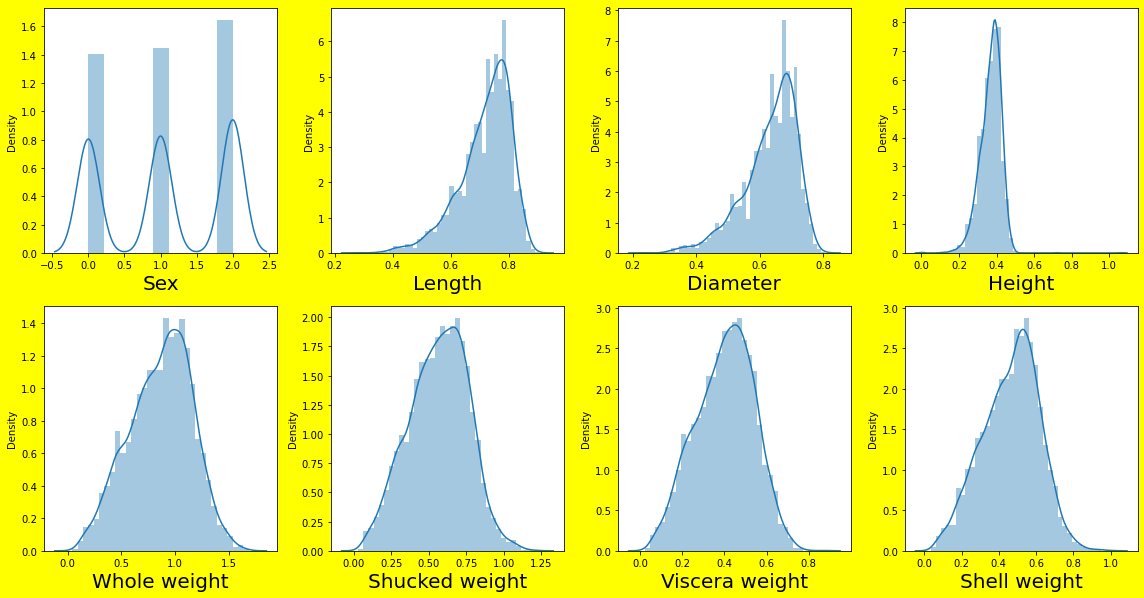

In [29]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in x_new:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()
    

# Finding Outliers

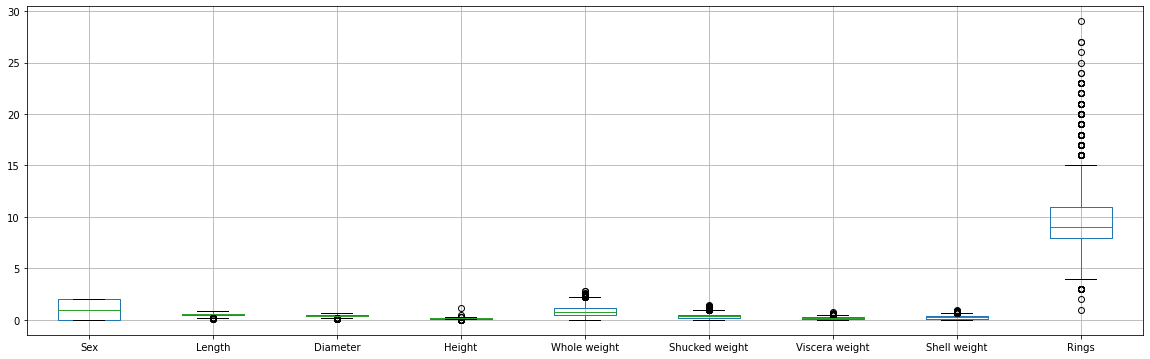

In [30]:
df.boxplot(figsize=[20,12])
plt.subplots_adjust(bottom=0.5)
plt.show()

* From above box plots we have found outliers in all the columns

# Removing outliers using zscore

In [31]:
scores=np.abs(zscore(df))
t=3
np.where(scores>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

* Data after removing outliers

In [32]:
df_new=df[(scores<3).all(axis=1)]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4027 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4027 non-null   int32  
 1   Length          4027 non-null   float64
 2   Diameter        4027 non-null   float64
 3   Height          4027 non-null   float64
 4   Whole weight    4027 non-null   float64
 5   Shucked weight  4027 non-null   float64
 6   Viscera weight  4027 non-null   float64
 7   Shell weight    4027 non-null   float64
 8   Rings           4027 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 298.9 KB


* Removed outliers data has a 4027 values from extracted from 4176

In [33]:
df_new.reset_index()  # Index reset 

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4022,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4023,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4024,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4025,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Scaling of data using StandardScaler

In [34]:
x_new=df_new.drop('Rings',axis=1)
y=df_new['Rings']
print(x_new.shape,y.shape)

(4027, 8) (4027,)


In [35]:
std=StandardScaler()
x_scaled=std.fit_transform(x_new)
scaled=pd.DataFrame(x_scaled,columns=x_new.columns)
scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.159698,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,1.159698,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-1.285382,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,1.159698,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-0.062842,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290
...,...,...,...,...,...,...,...,...
4022,-1.285382,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240
4023,1.159698,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138
4024,1.159698,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453
4025,-1.285382,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647


* The data shows scaled values using StandardScaler

# PCA
* Here we have a 4027 rows of data,so its important to apply PCA 

In [36]:
pca=PCA(n_components=8).fit_transform(scaled) # FIt the data to PCA
x_pca=pd.DataFrame(pca,columns=['f1','f2','f3','f4','f5','f6','f7','f8'])
x_pca

,f1,f2,f3,f4,f5,f6,f7,f8
0,-1.808345,-1.130060,0.234601,0.441644,0.283971,-0.008926,0.114995,-0.022197
1,-3.500015,-1.097369,0.163717,-0.182233,0.011644,-0.013929,0.010312,0.002806
2,-0.378586,1.304063,-0.396311,0.282646,0.120065,0.045198,0.042485,-0.049163
3,-1.512301,-1.125678,-0.230581,-0.083626,-0.047438,0.031405,0.193991,-0.005071
4,-3.794196,0.126392,0.368646,-0.131992,0.043420,-0.050442,0.061373,-0.027293
...,...,...,...,...,...,...,...,...
4022,1.009052,1.279020,-0.330694,-0.113559,-0.260430,0.371979,0.072004,0.044144
4023,0.844225,-1.181361,0.239449,0.387719,0.078735,0.083858,-0.144228,-0.000979
4024,2.453083,-1.197112,-0.502883,-0.627253,-0.667464,0.174432,0.039682,0.016777
4025,1.884122,1.242751,0.298577,0.414838,-0.079155,0.096971,-0.020312,0.101571


<AxesSubplot:>

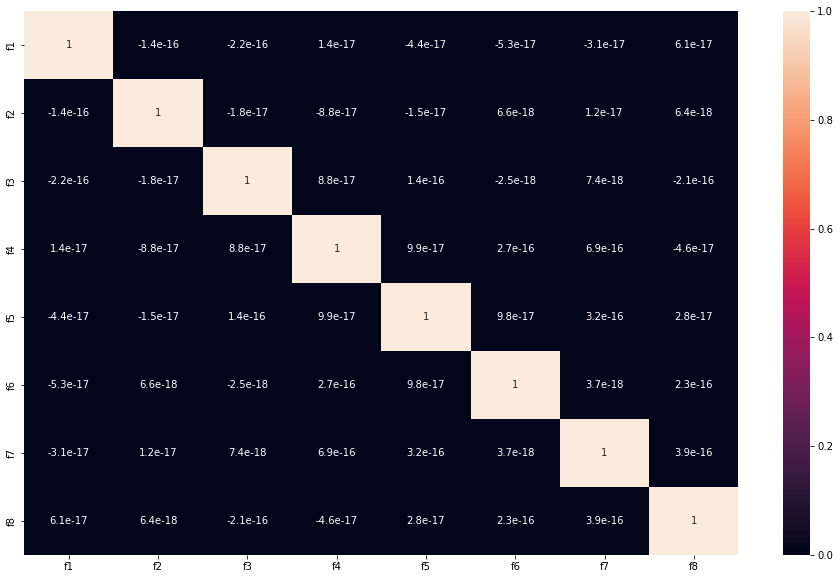

In [37]:
plt.figure(figsize=[16,10])
sns.heatmap(x_pca.corr(),annot=True)

* The above corr_mat shows correlation matrix after applying PCA

# Creating train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3020, 8) (1007, 8) (3020,) (1007,)


# Modeling 

# Modeling using LinearRegression

In [39]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
y_pred

array([15.69496981,  7.23254593,  9.9654207 , ...,  8.94284055,
       10.79965817, 11.53456068])

# Modeling using RandomForestClassifier

In [40]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_predclf=clf.predict(x_test)
y_predclf

array([13,  6,  9, ...,  9, 10, 14], dtype=int64)

# Evaluation score for LinearRegression

In [41]:
#Evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
#r2 score
r2=r2_score(y_test,y_pred)
print('R2 Score is: ',r2)

RMSE:  1.9758747041054276
R2 Score is:  0.5094065413133526


* Hence we got a R2 score of 0.51 with RMSE value 1.976 by using LinearRegression model

# Evaluation score for RandomForestClassifier

In [42]:
#Evaluation
mse=mean_squared_error(y_test,y_predclf)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
#r2 score
r2=r2_score(y_test,y_predclf)
acc=accuracy_score(y_test,y_predclf)
print('R2 Score is: ',r2)
print("Accuracy Score is: ",acc)

RMSE:  2.2085866555097473
R2 Score is:  0.3870404182374654
Accuracy Score is:  0.2611717974180735


* Hence we got a R2 Score of 0.387 and accuracy score is 0.261 with RMSE value 2.2 by using RandomForestClassifier

# Hyperparameter Tuning using GridSearchCV algorithm

In [43]:
grid_param={               #The maximum depth of tree 
    'min_samples_leaf':range(2,10),         # The minimum number of samples required to be at a leaf node.
    'min_samples_split':range(3,10),         
    
}
print(grid_param)

{'min_samples_leaf': range(2, 10), 'min_samples_split': range(3, 10)}


In [44]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)     # Use all the cores in your system.For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [45]:
best_parameters=grid_search.best_params_
best_parameters

{'min_samples_leaf': 8, 'min_samples_split': 9}

In [46]:
clf=RandomForestClassifier(min_samples_leaf= 8, min_samples_split= 8)

clf.fit(x_train,y_train)
y_predclf=clf.predict(x_test)
y_predclf

array([11,  6,  9, ...,  9,  9, 10], dtype=int64)

In [47]:
mse=mean_squared_error(y_test,y_predclf)
rmse=np.sqrt(mse)

acc=accuracy_score(y_test,y_predclf)
r2=r2_score(y_test,y_predclf)

print("Accuracy Score is: ",acc)
print("R2 Score is: ",r2)
print("RMSE value is: ",rmse)

Accuracy Score is:  0.2730883813306852
R2 Score is:  0.38654126548358714
RMSE value is:  2.20948573417736


* After tuning the model we got a best values of accuracy score 0.273,R2 score is 0.386 with RMSE value 2.2

# Saving model

In [49]:
import joblib
joblib.dump(acc,"AbaloneModel.pkl")

['AbaloneModel.pkl']